Load the dataset
Check the shape, info and describe of the dataset
Perform EDA on the dataset to check the relation between the variables, use regplots, heatmaps and boxplots
Check for null values and duplicates
Split the data in train and test dataset
Check for the accuracy of the model using R2 score

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
# Loading the dataset

In [4]:
data = pd.read_csv('Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df = data.copy()
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
# Chk for null values

In [7]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
# Stats of the model

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [11]:
# Chk for any duplicates

In [12]:
df.duplicated().sum()

0

In [13]:
# Chk for outliers

<Axes: xlabel='parking'>

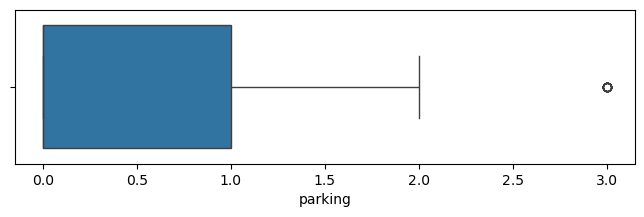

In [14]:
plt.figure(figsize=(8,2))
sns.boxplot(df['parking'], orient='h')

<Axes: xlabel='area'>

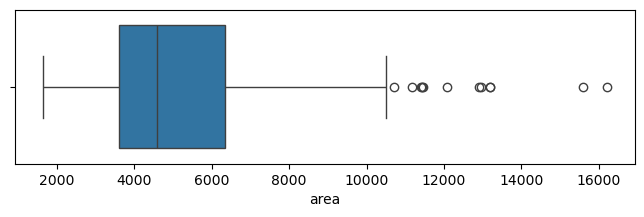

In [15]:
plt.figure(figsize=(8,2))
sns.boxplot(df['area'], orient='h')

<Axes: xlabel='bedrooms'>

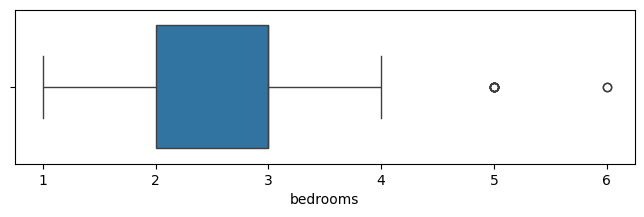

In [16]:
plt.figure(figsize=(8,2))
sns.boxplot(df['bedrooms'], orient='h')

<Axes: xlabel='bathrooms'>

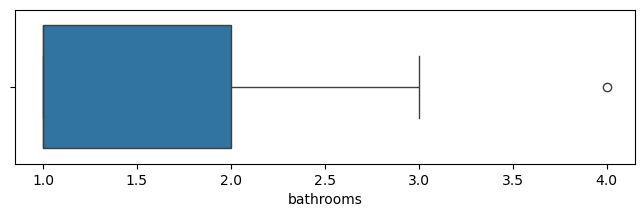

In [17]:
plt.figure(figsize=(8,2))
sns.boxplot(df['bathrooms'], orient='h')

In [18]:
# Convert string columns to numeric

In [19]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['mainroad'] = le.fit_transform(df['mainroad'])
df['guestroom'] = le.fit_transform(df['guestroom'])
df['basement'] = le.fit_transform(df['basement'])
df['hotwaterheating'] = le.fit_transform(df['hotwaterheating'])
df['airconditioning'] = le.fit_transform(df['airconditioning'])
df['prefarea'] = le.fit_transform(df['prefarea'])
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [21]:
# correlaion between the variables

<Axes: >

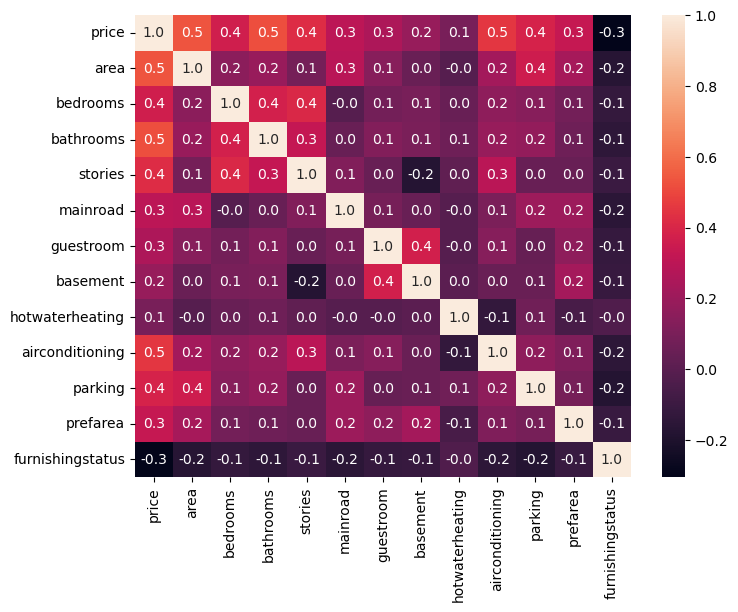

In [22]:
plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt = '0.1f')

In [23]:
X = df.drop('price', axis = 1)
y = df.price

In [24]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0


In [25]:
y[0:5]

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
X_train.shape, X_test.shape

((381, 12), (164, 12))

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
np.round(model.coef_, 2)

array([ 2.53060000e+02,  8.27348700e+04,  1.11737287e+06,  4.15801120e+05,
        4.08320460e+05,  2.79534040e+05,  4.84980220e+05,  6.19934350e+05,
        6.80006920e+05,  3.04078330e+05,  5.09441460e+05, -1.98031330e+05])

In [30]:
y_pred = model.predict(X_test)
y_pred

array([5407508.87024418, 7097185.46706855, 3055462.44314053,
       4476945.19636315, 3315983.65663579, 3618373.03255259,
       5758111.46044028, 6466502.43909126, 2830273.16469119,
       2588804.65810567, 9649589.31414054, 2830606.51113843,
       3048137.62898116, 3392779.60203048, 3823232.9673009 ,
       5358170.87034031, 2955016.41578148, 4836054.53230682,
       4603068.47740645, 3551464.60674927, 5625018.82657786,
       5796938.54363456, 2758483.74755246, 4873266.20950521,
       5600804.93370716, 7772078.63540938, 3381536.16270183,
       5370732.06725797, 8352665.9587942 , 3406110.06934798,
       6335677.41367624, 3427228.10570008, 6740746.88053742,
       4205633.93578768, 3624702.80095917, 5797171.46441145,
       5080025.13346592, 4386055.52335342, 3070137.54474224,
       4635050.40917587, 4743419.55702888, 3433682.48420934,
       7076940.4807988 , 4096598.07073102, 3741261.35302813,
       4308416.36745432, 6678982.6364043 , 4092649.04459023,
       3872211.05471678,

In [31]:
# accuracy score of the testing dataset

In [32]:
r2_score(y_test, y_pred)

0.6435419628959106

In [33]:
# accuracy score of the training dataset

In [34]:
y_pred_train = model.predict(X_train)
r2_score(y_train, y_pred_train)

0.6927795109061218

In [35]:
model.coef_

array([ 2.53062328e+02,  8.27348746e+04,  1.11737287e+06,  4.15801123e+05,
        4.08320465e+05,  2.79534041e+05,  4.84980215e+05,  6.19934347e+05,
        6.80006921e+05,  3.04078333e+05,  5.09441464e+05, -1.98031325e+05])

In [36]:
# Ridge or Lasso Regression are used to reduce the computation time of the model

In [37]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1.1)
ridge.fit(X_train, y_train)

Ridge(alpha=1.1)

In [38]:
ridge.coef_

array([ 2.54684459e+02,  8.67157720e+04,  1.10101317e+06,  4.17613137e+05,
        3.98481234e+05,  2.77422428e+05,  4.82921109e+05,  5.82063771e+05,
        6.68847722e+05,  3.05163724e+05,  5.01657352e+05, -1.99667567e+05])

In [39]:
ridge.score(X_test, y_test)

0.6429154747497273

In [40]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.7)
lasso.fit(X_train, y_train)

Lasso(alpha=0.7)

In [41]:
lasso.coef_

array([ 2.53063129e+02,  8.27345128e+04,  1.11737040e+06,  4.15801573e+05,
        4.08314579e+05,  2.79530511e+05,  4.84979502e+05,  6.19918810e+05,
        6.80003434e+05,  3.04078206e+05,  5.09438609e+05, -1.98031363e+05])

In [42]:
lasso.score(X_test, y_test)

0.6435415788924743